## Analyzing markets with Bollinger Bands

#### Importing Dependencies

In [22]:
import tradingeconomics as te
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt


from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import plotly.graph_objs as pgo


# from IPython.display import Image

#### API login


In [23]:
te.login("jupyter:jupyter") # Signup for a free API key at https://developer.tradingeconomics.com/

## Function

In [32]:
def get_bollinger_bands(symbol, plot_type,total_days_interval):

    initDate = str((datetime.today() - timedelta(days=total_days_interval)).date())
    endDate = str((datetime.now() + timedelta(days=1)).date())
    df = te.fetchMarkets(symbol=symbol, initDate=initDate, endDate=endDate, output_type="df")
    forecast = te.getMarketsForecasts(symbol=symbol, output_type='df')
    df1 = df.copy()
    df
    
    df['average'] = (df['close'] + df['low'] + df['high'])/3
    df['std'] = df['average'].rolling(20).std(ddof=0)

    # df['std'] = df['average'].rolling(window=20,min_periods=1).std(ddof=0) # Show the last 20 datapoint bollinger bands, it is not accurate 

    df['upper band'] = df['close'] + 2 * df['std']
    df['lower band'] = df['close'] - 2 * df['std']


   
    
    
    def get_static_plot(df,symbol):
    
        plt.style.use('bmh')
        fig, ax = plt.subplots(figsize=(20,5))  # Create a figure and an axes.
        ax.plot(df['upper band'], label='Upper Band')  # Plot some data on the axes.
        ax.plot(df['average'], label='Middle Band')  # Plot some data on the axes.
        ax.plot(df['lower band'], label='Lower Band')  # Plot some data on the axes.

        ax.set_xlabel('Date')  # Add an x-label to the axes.
        ax.set_ylabel('')  # Add a y-label to the axes.
        ax.set_title('Bollinger Bands for ' + symbol[:-4].upper())  # Add a title to the axes.
        ax.legend(fontsize='x-large')  # Add a legend.
        
    def get_dynamic_plot(df,symbol):
        fig = pgo.Figure()
        fig.add_trace(pgo.Scatter(x=df.index, y= df['upper band'], line=dict(color='red', width= 1), name ='Upper Band'))
        fig.add_trace(pgo.Scatter(x=df.index, y= df['average'], line=dict(color='blue', width= 0.7), name ='Middle Band'))
        fig.add_trace(pgo.Scatter(x=df.index, y= df['lower band'], line=dict(color='green', width= 1), name ='Lower Band'))

        fig.add_trace(pgo.Candlestick(x = df.index, open = df['open'], high = df['high'], low = df['low'], close = df['close'], name = symbol.upper() + ' Data'))

        fig.update_layout(title='Bollinger Bands for ' + symbol[:-4].upper(), yaxis_title='USD')

        fig.update_xaxes(rangeslider_visible = True,
                        rangeselector = dict(
                        buttons=list([           
                            dict(count=1, label='1 Month', step='month', stepmode='todate'),
                            dict(count=3, label='3 Month', step='month', stepmode='todate'),
                            dict(count=5, label='5 Month', step='month', stepmode='todate'),
                            dict(count=7, label='7 Month', step='month', stepmode='todate'),
                            dict(label='1 Year', step='all')
                        ])))
        fig.update_layout(
            autosize=True,
            height=700,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100
            )
        )

        fig.show()

        
        
    
    if plot_type == 'static':
        get_static_plot(df,symbol)
        
    if plot_type == 'dynamic':
        get_dynamic_plot(df,symbol)




#### Plot Request


Interpretation tips:
    
- Closing prices above the upper band can indicate that the market is overbought, we can interpretate it as the price is too high and price may decrease soon, not a good time to buy.
- Closing prices below the lower band is a sign to buy because the prices are too low and they may be moving up soon. On this moment the market is knows as Oversold.
    
<b>NOTE:</b> Before making investments following this example, keep in mind this is just a recreational example. 
    You should study and deepen other factors that help you make a good investment.


## GitHub non-dynamic preview

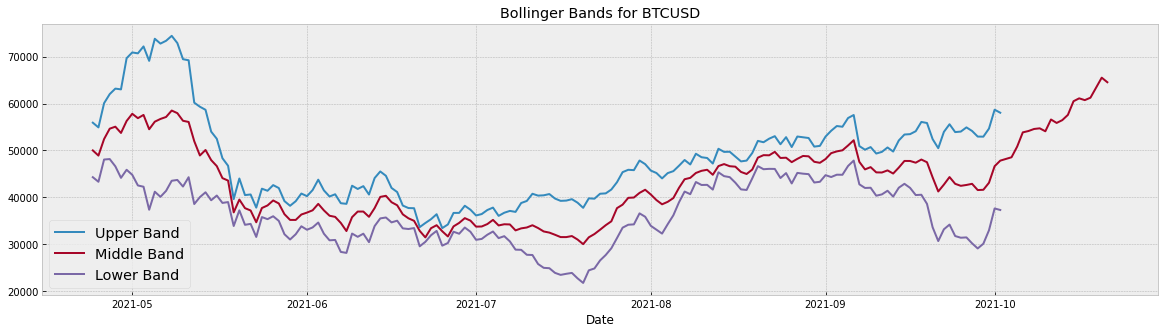

In [13]:
get_bollinger_bands(symbol="BTCUSD:CUR", plot_type='static',total_days_interval=180)

## Dynamic Plot uses Python's Kernel to render 
### (You can go to http://jupyter.tradingeconomics.com/ to use the dynamic plot)

In [20]:
get_bollinger_bands(symbol="BTCUSD:CUR", plot_type='dynamic',total_days_interval=360)